# Lab 2 : Clustering

The goal of this lab session is to code a clustering algorithm, apply it to data and compare the performance with other techniques.


We begin with the standard imports:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# I - Implementation of the different clustering algorithms

We will have two toy datasets to try the different methods in order to find the most coherent groups of point for each toy dataset.

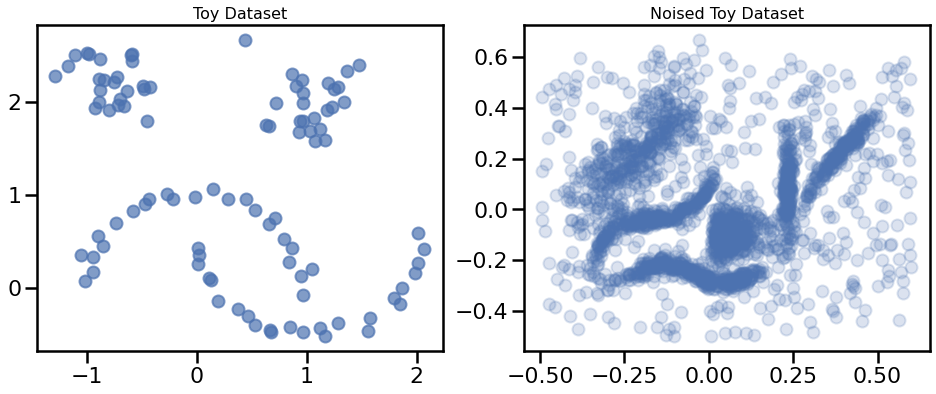

In [ ]:
import sklearn.datasets as data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data_0 = np.vstack([moons, blobs])

test_data_1 = np.load('clusterable_data.npy')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c='b', alpha=0.7)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], color='b', alpha=0.2)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show();

## I-1 K-means

K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). However, K-Means has a few problems caused by its simplicity. 

We try the `sklearn` implementation in our toy datasets:

### Task : Train two kmeans models for datasets test_data_0 and test_data_1 with an arbitrary number of clusters then return clustering labels for datasets test_data_0 and test_data_1.

In [ ]:
from sklearn.cluster import KMeans

"""
The output should be : 
kmeans_0_labels : list of labels for test_data_0
kmeans_1_labels : list of labels for test_data_1
"""

kmeans_0_labels = KMeans(4).fit(test_data_0).labels_
kmeans_1_labels = KMeans(4).fit(test_data_1).labels_


Text(0.5, 1.0, 'Noised Toy Dataset')

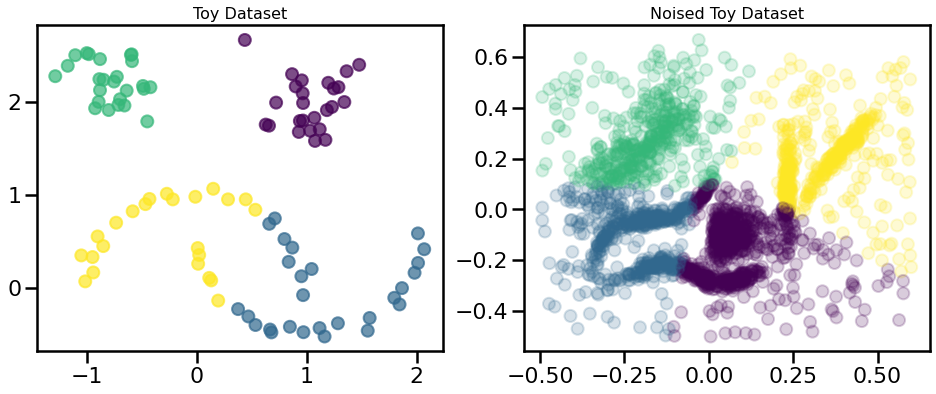

In [ ]:
## Plot the results of the clustering - Run this code

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=kmeans_0_labels , alpha=0.7)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=kmeans_1_labels, alpha=0.2)
ax[1].set_title('Noised Toy Dataset', size=16)

## I-2 How do we choose the number of clusters in kmeans ? 
-By knowing in advance the number of clusters you want to create. For instance you want to divide the clients of an investment bank in three groups depicting the clients' willingness to take risks : low-risk investments clients - average risk-investments clients - high-risk investments client

-By plotting the data. Need a 2D/3D data => could be achieved by dimensionnality reduction methods like PCA or t-SNE etc...

-With metrics (Elbow method, davies-bouldin index, silhouette score)

### The elbow method :

The elbow method is often use to choose the number of cluster K. It consists in computing for several K the inertia $I_K$ induced by the clustering. Then choose $K^*$ sush as $K^* = argmax \frac{d^2}{dK^2} I_K$. It means that $K^*$ is the cutoff point where the decreasing of the inertia is going from sharp to slow.


### Question 
Find the expression of the Inertia for clustering. What could be its interpretation in terms of Variance ? 

Answer : The formula of inertia is 𝐼=∑𝑖(𝑑(𝑖,𝑐)), it is the sum of the squared distances (d) between each point (i) and the centroid (c) that it has assigned.

The intpretation is how close are the data points to the assigned centroid of the cluster. The bigger the inertia, the more distant the data is from the centroid.

### Question 
What could be the reason for choosing $K^*$ like that ?

Answer : K is chosen that way because when there is not a significant decrease in the inertia with an aditional cluster, there would be no reason for assigning more groups to classify the data. 

### Task : Fill the plot_inertia fonction 

In [ ]:
def plot_inertia(k_min,k_max,data):
    """ Fit several kmeans models with different K in order to find visually the optimal K with the elbow method 

    Output : 
    plot the inertia as a function of the number of clusters
    """
    inertia = []
    for k in range(k_min,k_max):
      kmeanModel = KMeans(n_clusters=k)
      kmeanModel.fit(data)
      inertia.append(kmeanModel.inertia_)

        
        
        
    plt.plot([k for k in range(k_min,k_max)],inertia)

### Task : Using the plot_inertia function and the elbow method, find visually $K^*$ for test_data_0 and test_data_1 ; then plot your clusterings with the scatterplot

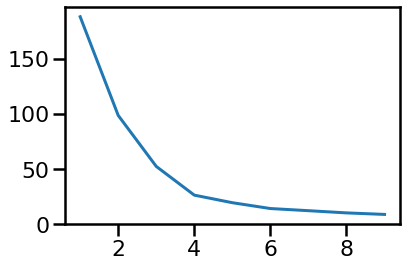

In [ ]:
#TODO
plot_inertia(1,10,test_data_0)

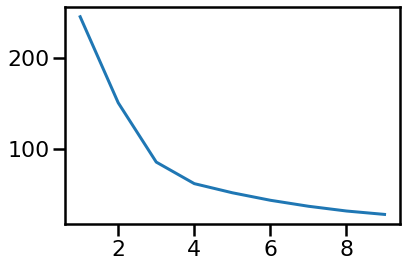

In [ ]:
plot_inertia(1,10,test_data_1)

## I-3 Aglomerative Single Linkage clustering

Agglomerative clustering is a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it's own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. Do this repeatedly until you have only one cluster and you get get a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset. The most basic version of this, single linkage, chooses the closest cluster to merge, and hence the tree can be ranked by distance as to when clusters merged/split.



### Task  : use the cluster.AgglomerativeClustering function of sklearn for dataset test_data_0 and test_data_1 with a single linka and with the number of cluster of your choice

In [ ]:
# TODO
from sklearn.cluster import AgglomerativeClustering as ac

linkage_0 = ac(4,linkage = 'single').fit(test_data_0)
linkage_1 = ac(4,linkage = 'single').fit(test_data_1)



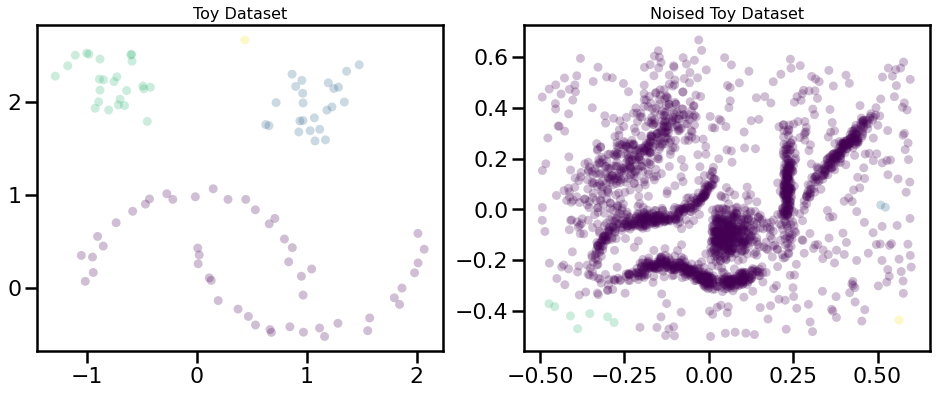

In [ ]:
### Plot your results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = linkage_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = linkage_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

### Question : Comment the results :

In [ ]:
# Using single linkage:
# With sparse data, this clustering technique has very good results
# and the figures don't need to be centered as with k-means.
# With dense data such as the noised toy dataset, the results aren't
# good, the algorithm is not able to group the data appropiately.

### Task : Now use the cluster.AgglomerativeClustering function for dataset test_data_0 and test_data_1 with a WARD linkage, and with the number of clusters of your choice. Then plot the results

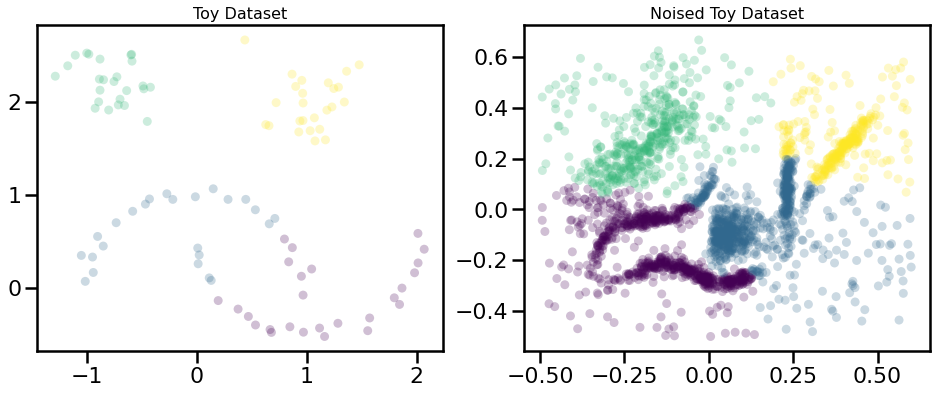

In [ ]:
#TODO

ward_0 = ac(4,linkage = 'ward').fit(test_data_0)
ward_1 = ac(4,linkage = 'ward').fit(test_data_1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = ward_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = ward_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()



### Question : Give a possible explanation of why ward linkage performs better than single linkage

In [ ]:
# The single linkage is just revewing distances between points whereas
# the ward linkage is minimizing the sum of errors of each cluster,
# with dense data it performs better by minimizing the sum of error because
# the first linkage doesn't is very sensitive to outliers and noise.
# In contrast, the objective function of the ward distance allows to handle better
# noisy data by minimizing the sum of errors.

## I-4 DBSCAN

DBSCAN is a density based algorithm -- it assumes clusters for dense regions. It is also the first actual clustering algorithm we've looked at: it doesn't require that every point be assigned to a cluster and hence doesn't partition the data, but instead extracts the 'dense' clusters and leaves sparse background classified as 'noise'. In practice DBSCAN is related to agglomerative clustering. As a first step DBSCAN transforms the space according to the density of the data: points in dense regions are left alone, while points in sparse regions are moved further away. Applying single linkage clustering to the transformed space results in a dendrogram, which we cut according to a distance parameter (called epsilon or `eps` in many implementations) to get clusters. Importantly any singleton clusters at that cut level are deemed to be 'noise' and left unclustered. 

### Task : Apply it to the test_data and plot the results. How do you tune the parameters?

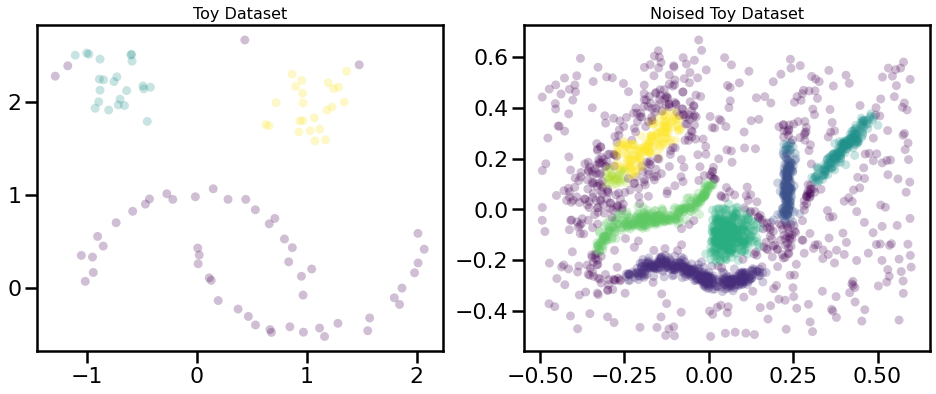

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_0 = DBSCAN(eps = 0.3, min_samples = 7).fit(test_data_0)
dbscan_1 = DBSCAN(eps = 0.03, min_samples = 20).fit(test_data_1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = dbscan_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = dbscan_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

# To choose the min_samples it is necessary to assess the amount of points
# in the data, when there is more data and there exists noise, the number
# of min_samples should increase.

# Based on the number of min_samples, the epsilon distance can be calculated
# as the average distance between each data point and its closest min_samples,
# and apply a similar technique to the elbow method with inertia, the epsilon
# that provides less change when increased can be selected. 

## HDBSCAN

HDBSCAN is a recent algorithm developed by some of the same people who wrote the original DBSCAN paper. Their goal was to allow varying density clusters. The algorithm starts off much the same as DBSCAN: we transform the space according to density, exactly as DBSCAN does, and perform single linkage clustering on the transformed space. Instead of taking an epsilon value as a cut level for the dendrogram however, a different approach is taken: the dendrogram is condensed by viewing splits that result in a small number of points splitting off as points 'falling out of a cluster'. This results in a smaller tree with fewer clusters that 'lose points'. That tree can then be used to select the most stable or persistent clusters. This process allows the tree to be cut at varying height, picking our varying density clusters based on cluster stability.

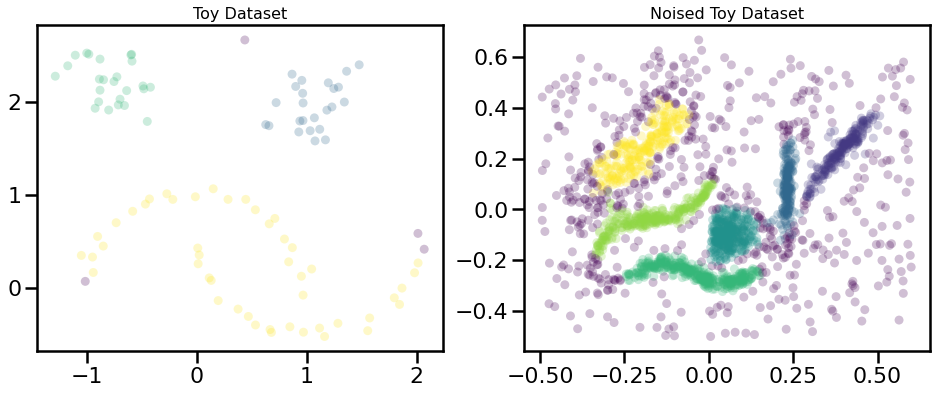

In [ ]:
!pip install hdbscan #for google colab
#pip install hdbscan #for jupyter notebooks

import hdbscan as h
#if you can't import hdbscan you have to type 'pip install hdbscan' in your terminal

hdbscan_0 = h.HDBSCAN(min_cluster_size=7).fit(test_data_0)
hdbscan_1 = h.HDBSCAN(min_cluster_size=20).fit(test_data_1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = hdbscan_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = hdbscan_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()


#TODO

# II Practical exercices

## II-1 NASA Curiosity Picture

- Look at following NASA photo taken by a robot in mars:


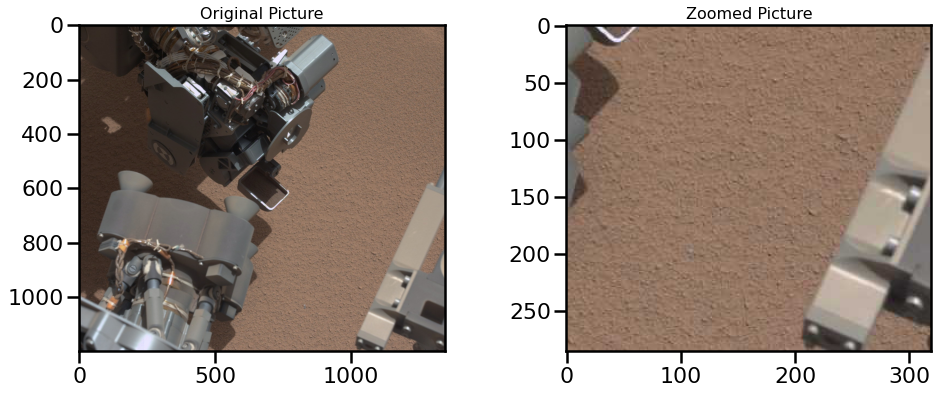

(286, 320, 3)


In [ ]:
from PIL import Image

Im_1  = Image.open('im_nasa_reduced.jpg')
Im_0  = Image.open('im_nasa.jpg')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(Im_0)
ax[0].set_title('Original Picture', size=16)

ax[1].imshow(Im_1)
ax[1].set_title('Zoomed Picture', size=16)

plt.show()
Im_matrix = np.array(Im_1)/255.0
print(Im_matrix.shape)

Transform the image (Im_matrix) to an intensity (I) and saturation (S) representation, it helps to distinguish bright and textures.
For each pixel i we should have : 
$$I_i=\frac{R_i+G_i+B_i}{3}$$
$$S_i=1-I_i\times min(R_i, G_i, B_i)$$

### TASK : You have to create a matrix $IS$ of size $91520\times2$ such as $IS=\{I_i,S_i\}_{1\le i\le91520}$ 

tips: you can use the method $\texttt{.reshape}$ on a np.array() to give the array the size you want

In [ ]:
#TODO 
I = []
S = []
for i in range(0,Im_matrix.shape[0]):
  for j in range(0,Im_matrix.shape[1]):
    r = Im_matrix[i, j, 0]
    g = Im_matrix[i, j, 1]
    b = Im_matrix[i, j, 2]
    intensity = (r + g + b)/3
    I.append(intensity)
    s = 1 - intensity*min(r,g,b)
    S.append(s)

listFinal = []
listFinal.append(I)
listFinal.append(S)

listFinal = np.array(listFinal)
lista = []
for i in range (0,listFinal.shape[1]):
  lista.append([listFinal[0,i],listFinal[1,i]])

lista = np.array(lista)
lista.shape


(91520, 2)

### TASK : Apply one clustering algorithm of your choice on dataset IS to segment the image i.e find pixels representing the robot, mars surface etc... 


[0, 1, 2]


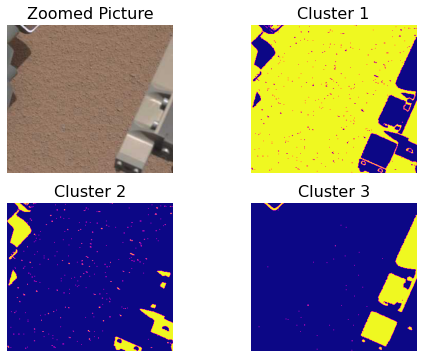

 
The yellow color shows what was selected for a specific cluster.
as the selected algorithm is k-means the order of the outputs may
vary according on the initial conditions of the centroids of the algorithm.
The coordinates of cluster one are: 
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)] , ...
The coordinates of cluster two are: 
[(0, 13), (0, 14), (0, 15), (0, 16), (0, 17)] , ...
The coordinates of cluster three are: 
[(0, 25), (0, 26), (0, 27), (0, 28), (0, 29)] , ...


In [ ]:
### TODO

from sklearn.cluster import KMeans

# 3 clusters:
# one for the floor
# one for the robot dark gray
# one for the robot lighter gray
kmeans_img = KMeans(3).fit(lista)


img = kmeans_img.labels_.reshape(Im_matrix.shape[0],Im_matrix.shape[1])

labels = list(set(kmeans_img.labels_))
print(labels)

matrix_1 = np.zeros((Im_matrix.shape[0],Im_matrix.shape[1]))
matrix_2 = np.zeros((Im_matrix.shape[0],Im_matrix.shape[1]))
matrix_3 = np.zeros((Im_matrix.shape[0],Im_matrix.shape[1]))

pixel_location_cluster_1 = []
pixel_location_cluster_2 = []
pixel_location_cluster_3 = []

for i in range (0, img.shape[0]):
  for j in range (0, img.shape[1]): 
    if img[i,j] == 0:
      matrix_1[i,j] = 255
      pixel_location_cluster_1.append((i,j))
    if img[i,j] == 1:
      matrix_2[i,j] = 255
      pixel_location_cluster_2.append((i,j))
    if img[i,j] == 2:
      matrix_3[i,j] = 255
      pixel_location_cluster_3.append((i,j))

fig, ax = plt.subplots(2, 2, figsize=(8, 6))

ax[0,0].imshow(Im_1)
ax[0,0].set_title('Zoomed Picture', size=16)
ax[0,0].axis('off')

ax[0,1].imshow(matrix_1, cmap='plasma', vmin=0, vmax=255)
ax[0,1].set_title('Cluster 1', size=16)
ax[0,1].axis('off')

ax[1,0].imshow(matrix_2, cmap='plasma', vmin=0, vmax=255)
ax[1,0].set_title('Cluster 2', size=16)
ax[1,0].axis('off')

ax[1,1].imshow(matrix_3, cmap='plasma', vmin=0, vmax=255)
ax[1,1].set_title('Cluster 3', size=16)
ax[1,1].axis('off')
plt.show()

print(' ')
print('The yellow color shows what was selected for a specific cluster.')
print('as the selected algorithm is k-means the order of the outputs may')
print('vary according on the initial conditions of the centroids of the algorithm.')
print('The coordinates of cluster one are: ')
print( pixel_location_cluster_1[0:5], ', ...')
print('The coordinates of cluster two are: ')
print(pixel_location_cluster_2[0:5], ', ...')
print('The coordinates of cluster three are: ')
print(pixel_location_cluster_3[0:5], ', ...')

### TASK : Then Plot the segmented image and comment the results and check if you find something on mars' surface.


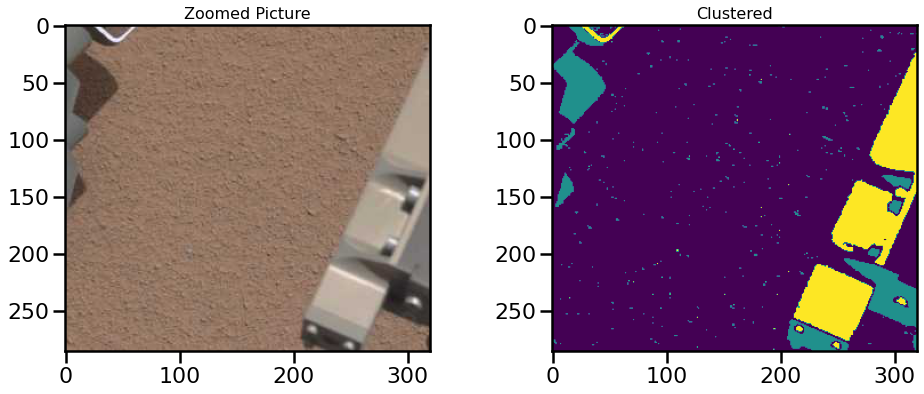

In [ ]:
### TODO
new_colors = kmeans_img.labels_.reshape(286, 320)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].imshow(Im_1)
ax[0].set_title('Zoomed Picture', size=16)

##plot new_colors
ax[1].imshow(new_colors) #new colors must be an array of size 286x320
ax[1].set_title('Clustered', size=16)
plt.show()

# The grains of mars surface are visible after applying a clustering
# technique.

## II-2 Color compression

One interesting application of clustering is in color compression within images. 
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.
Get a simplified colored version of the following image by applying k-means:

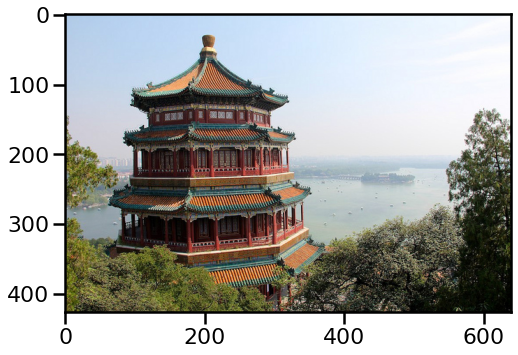

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

fig = plt.figure(figsize=(8, 6))
plt.imshow(china);

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)

### Apply clustering methods on the colors of the image. 
For each cluster of colors you can assign a new color corresponding to the color vector of the center of the cluster. The sklearn kmeans can provide the center of each cluster with the attributes cluster_centers_

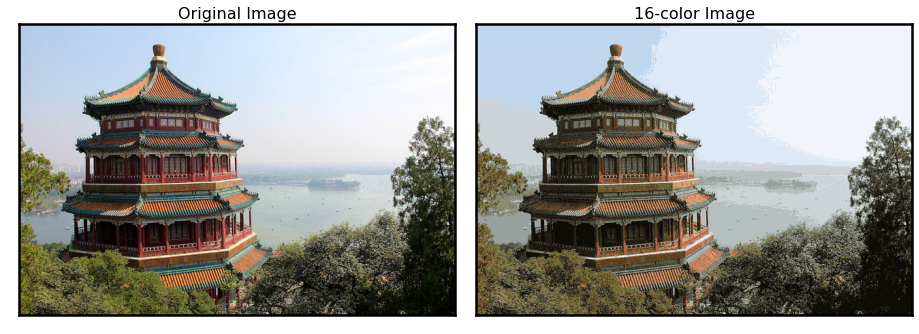

In [ ]:

kmeans_china = KMeans(16).fit(data)

new_colors = []
for clabel in kmeans_china.labels_:
    new_colors.append(kmeans_china.cluster_centers_[clabel])

new_colors = np.array(new_colors)

china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);